In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch import nn

In [3]:
yf.__version__

'0.2.54'

In [4]:
pip install kagglehub[pandas-datasets]

In [4]:
from google.colab import files
uploaded = files.upload()

sp500 = pd.read_csv('sp500_companies.csv')
sp500.head()

Saving sp500_companies.csv to sp500_companies.csv


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [5]:
sp500_tickers = sp500['Symbol'].tolist()
sp500_tickers


['AAPL',
 'NVDA',
 'MSFT',
 'AMZN',
 'GOOGL',
 'GOOG',
 'META',
 'TSLA',
 'AVGO',
 'BRK-B',
 'WMT',
 'LLY',
 'JPM',
 'V',
 'MA',
 'ORCL',
 'XOM',
 'UNH',
 'COST',
 'PG',
 'HD',
 'NFLX',
 'JNJ',
 'BAC',
 'CRM',
 'ABBV',
 'KO',
 'TMUS',
 'CVX',
 'MRK',
 'WFC',
 'CSCO',
 'ACN',
 'NOW',
 'AXP',
 'MCD',
 'PEP',
 'BX',
 'IBM',
 'DIS',
 'LIN',
 'TMO',
 'MS',
 'ABT',
 'ADBE',
 'AMD',
 'PM',
 'ISRG',
 'PLTR',
 'GE',
 'INTU',
 'GS',
 'CAT',
 'TXN',
 'QCOM',
 'VZ',
 'BKNG',
 'DHR',
 'T',
 'BLK',
 'RTX',
 'SPGI',
 'PFE',
 'HON',
 'NEE',
 'CMCSA',
 'ANET',
 'AMGN',
 'PGR',
 'LOW',
 'SYK',
 'UNP',
 'TJX',
 'KKR',
 'SCHW',
 'ETN',
 'AMAT',
 'BA',
 'BSX',
 'C',
 'UBER',
 'COP',
 'PANW',
 'ADP',
 'DE',
 'FI',
 'BMY',
 'LMT',
 'GILD',
 'NKE',
 'CB',
 'UPS',
 'ADI',
 'MMC',
 'MDT',
 'VRTX',
 'MU',
 'SBUX',
 'PLD',
 'GEV',
 'LRCX',
 'MO',
 'SO',
 'EQIX',
 'CRWD',
 'PYPL',
 'SHW',
 'ICE',
 'CME',
 'AMT',
 'APH',
 'ELV',
 'TT',
 'MCO',
 'CMG',
 'INTC',
 'KLAC',
 'ABNB',
 'DUK',
 'PH',
 'CDNS',
 'WM',
 'DELL

How to download a stock's stock price history for a perticular interval:


In [6]:
import time

**Apple stock example:**

In [38]:
ticker = "AAPL"
stock = yf.Ticker(ticker)

stock_info = stock.info

historical_data = yf.download(ticker, start="2015-01-01", end="2025-01-01", interval="1wk")
# historical_data = stock.history(period="5y")
historical_data["EPS"] = stock.info.get("trailingEps", None)  # Earnings per share
historical_data["PE_Ratio"] = stock.info.get("trailingPE", None)  # Price to earnings ratio
historical_data["Market_Cap"] = stock.info.get("marketCap", None)  # Market capitalization
historical_data["Beta"] = stock.info.get("beta", None)
print(historical_data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open      Volume   EPS  \
Ticker           AAPL       AAPL       AAPL       AAPL        AAPL         
Date                                                                       
2015-01-01  23.968962  24.789802  23.274918  24.778679   893572400  6.29   
2015-01-08  24.424992  25.192443  24.135806  24.298195  1115053200  6.29   
2015-01-15  24.369370  24.705267  23.401712  24.469471   948012400  6.29   
2015-01-22  25.650684  26.275769  24.253700  24.527314  1591688000  6.29   
2015-01-29  26.596087  26.807415  25.706288  25.875350  1411945600  6.29   

Price        PE_Ratio     Market_Cap   Beta  
Ticker                                       
Date                                         
2015-01-01  33.335453  3149833961472  1.178  
2015-01-08  33.335453  3149833961472  1.178  
2015-01-15  33.335453  3149833961472  1.178  
2015-01-22  33.335453  3149833961472  1.178  
2015-01-29  33.335453  3149833961472  1.178  


**Download S&P500 stock data:**

In [295]:
# Just testing download methods
# dft = yf.download(sp500_tickers,start="2015-01-01", end="2025-01-01", interval="1wk")

[***********           22%                       ]  108 of 502 completed

KeyboardInterrupt: 

In [158]:
def download_stock_data(ticker_list):
"""Function to download s&p500 stocks given a list of tickers""""
  all_stock_data = {}

  for i, ticker in enumerate(ticker_list):
      try:
          stock = yf.Ticker(ticker)
          stock_data = yf.download(ticker, start="2015-01-01", end="2025-01-01", interval="1wk")
          stock_data = stock_data.xs(ticker, axis=1, level="Ticker")

          stock_info = stock.info
          stock_data["EPS"] = stock_info.get("trailingEps", None)  # Earnings per share
          stock_data["PE_Ratio"] = stock_info.get("trailingPE", None)  # Price to earnings ratio
          stock_data["Market_Cap"] = stock_info.get("marketCap", None)  # Market capitalization
          stock_data["Beta"] = stock_info.get("beta", None)

          stock_data.index.name = 'Date'
          stock_data.reset_index(inplace=True)
          stock_data['Date'] = pd.to_datetime(stock_data['Date'])
          stock_data.set_index('Date', inplace=True)
          all_stock_data[ticker] = stock_data
          print(f"Downloaded {ticker} ({i+1}/{len(sp500_tickers)})")
          time.sleep(1)  # Add delay to prevent being blocked
      except Exception as e:
          print(f"Failed to download {ticker}: {e}")

  aligned_stock_data = pd.concat(all_stock_data, axis=1)
  # aligned_stock_data = aligned_stock_data.xs(tuple(ticker_list), axis=1, level="Ticker")

  return aligned_stock_data

In [159]:
aligned_stock_data = download_stock_data(sp500_tickers)

[*********************100%***********************]  1 of 1 completed


Downloaded AAPL (1/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NVDA (2/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MSFT (3/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMZN (4/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GOOGL (5/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GOOG (6/502)


[*********************100%***********************]  1 of 1 completed


Downloaded META (7/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TSLA (8/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AVGO (9/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BRK-B (10/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WMT (11/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LLY (12/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JPM (13/502)


[*********************100%***********************]  1 of 1 completed


Downloaded V (14/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MA (15/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ORCL (16/502)


[*********************100%***********************]  1 of 1 completed


Downloaded XOM (17/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UNH (18/502)


[*********************100%***********************]  1 of 1 completed


Downloaded COST (19/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PG (20/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HD (21/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NFLX (22/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JNJ (23/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BAC (24/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CRM (25/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ABBV (26/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KO (27/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TMUS (28/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CVX (29/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MRK (30/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WFC (31/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CSCO (32/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ACN (33/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NOW (34/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AXP (35/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MCD (36/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PEP (37/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BX (38/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IBM (39/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DIS (40/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LIN (41/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TMO (42/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MS (43/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ABT (44/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ADBE (45/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMD (46/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PM (47/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ISRG (48/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PLTR (49/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GE (50/502)


[*********************100%***********************]  1 of 1 completed


Downloaded INTU (51/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GS (52/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CAT (53/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TXN (54/502)


[*********************100%***********************]  1 of 1 completed


Downloaded QCOM (55/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VZ (56/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BKNG (57/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DHR (58/502)


[*********************100%***********************]  1 of 1 completed


Downloaded T (59/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BLK (60/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RTX (61/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SPGI (62/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PFE (63/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HON (64/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NEE (65/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CMCSA (66/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ANET (67/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMGN (68/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PGR (69/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LOW (70/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SYK (71/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UNP (72/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TJX (73/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KKR (74/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SCHW (75/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ETN (76/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMAT (77/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BA (78/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BSX (79/502)


[*********************100%***********************]  1 of 1 completed


Downloaded C (80/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UBER (81/502)


[*********************100%***********************]  1 of 1 completed


Downloaded COP (82/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PANW (83/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ADP (84/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DE (85/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FI (86/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BMY (87/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LMT (88/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GILD (89/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NKE (90/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CB (91/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UPS (92/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ADI (93/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MMC (94/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MDT (95/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VRTX (96/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MU (97/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SBUX (98/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PLD (99/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GEV (100/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LRCX (101/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MO (102/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SO (103/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EQIX (104/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CRWD (105/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PYPL (106/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SHW (107/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ICE (108/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CME (109/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMT (110/502)


[*********************100%***********************]  1 of 1 completed


Downloaded APH (111/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ELV (112/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TT (113/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MCO (114/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CMG (115/502)


[*********************100%***********************]  1 of 1 completed


Downloaded INTC (116/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KLAC (117/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ABNB (118/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DUK (119/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PH (120/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CDNS (121/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WM (122/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DELL (123/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MDLZ (124/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MAR (125/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MSI (126/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WELL (127/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AON (128/502)


[*********************100%***********************]  1 of 1 completed


Downloaded REGN (129/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CI (130/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HCA (131/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PNC (132/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ITW (133/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SNPS (134/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CTAS (135/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CL (136/502)


[*********************100%***********************]  1 of 1 completed


Downloaded USB (137/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FTNT (138/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ZTS (139/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MCK (140/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GD (141/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TDG (142/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CEG (143/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AJG (144/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EMR (145/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MMM (146/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ORLY (147/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NOC (148/502)


[*********************100%***********************]  1 of 1 completed


Downloaded COF (149/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ECL (150/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EOG (151/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FDX (152/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BDX (153/502)


[*********************100%***********************]  1 of 1 completed


Downloaded APD (154/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WMB (155/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SPG (156/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ADSK (157/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RCL (158/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RSG (159/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CARR (160/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CSX (161/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HLT (162/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DLR (163/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TGT (164/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KMI (165/502)


[*********************100%***********************]  1 of 1 completed


Downloaded OKE (166/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TFC (167/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AFL (168/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GM (169/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BK (170/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ROP (171/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MET (172/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CPRT (173/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FCX (174/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CVS (175/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PCAR (176/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SRE (177/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AZO (178/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TRV (179/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NXPI (180/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JCI (181/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GWW (182/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NSC (183/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PSA (184/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SLB (185/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMP (186/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ALL (187/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FICO (188/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MNST (189/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PAYX (190/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CHTR (191/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AEP (192/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ROST (193/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PWR (194/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CMI (195/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AXON (196/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VST (197/502)


[*********************100%***********************]  1 of 1 completed


Downloaded URI (198/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MSCI (199/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LULU (200/502)


[*********************100%***********************]  1 of 1 completed


Downloaded O (201/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PSX (202/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AIG (203/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FANG (204/502)


[*********************100%***********************]  1 of 1 completed


Downloaded D (205/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HWM (206/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DHI (207/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KR (208/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NDAQ (209/502)


[*********************100%***********************]  1 of 1 completed


Downloaded OXY (210/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EW (211/502)


[*********************100%***********************]  1 of 1 completed


Downloaded COR (212/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KDP (213/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FIS (214/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KMB (215/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NEM (216/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DFS (217/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PCG (218/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TEL (219/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MPC (220/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FAST (221/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AME (222/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PEG (223/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PRU (224/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KVUE (225/502)


[*********************100%***********************]  1 of 1 completed


Downloaded STZ (226/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GLW (227/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LHX (228/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GRMN (229/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BKR (230/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CBRE (231/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CTVA (232/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HES (233/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CCI (234/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DAL (235/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CTSH (236/502)


[*********************100%***********************]  1 of 1 completed


Downloaded F (237/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VRSK (238/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EA (239/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ODFL (240/502)


[*********************100%***********************]  1 of 1 completed


Downloaded XEL (241/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TRGP (242/502)


[*********************100%***********************]  1 of 1 completed


Downloaded A (243/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IT (244/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LVS (245/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SYY (246/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VLO (247/502)


[*********************100%***********************]  1 of 1 completed


Downloaded OTIS (248/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LEN (249/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EXC (250/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IR (251/502)


[*********************100%***********************]  1 of 1 completed


Downloaded YUM (252/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KHC (253/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GEHC (254/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IQV (255/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GIS (256/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CCL (257/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RMD (258/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VMC (259/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HSY (260/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ACGL (261/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IDXX (262/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WAB (263/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ROK (264/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MLM (265/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EXR (266/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DD (267/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ETR (268/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DECK (269/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EFX (270/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UAL (271/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WTW (272/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TTWO (273/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HIG (274/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RJF (275/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AVB (276/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MTB (277/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DXCM (278/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ED (279/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EBAY (280/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HPQ (281/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IRM (282/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EIX (283/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LYV (284/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VICI (285/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CNC (286/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WEC (287/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MCHP (288/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HUM (289/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ANSS (290/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BRO (291/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CSGP (292/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MPWR (293/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GDDY (294/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TSCO (295/502)


[*********************100%***********************]  1 of 1 completed


Downloaded STT (296/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CAH (297/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GPN (298/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FITB (299/502)


[*********************100%***********************]  1 of 1 completed


Downloaded XYL (300/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HPE (301/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KEYS (302/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DOW (303/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EQR (304/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ON (305/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PPG (306/502)


[*********************100%***********************]  1 of 1 completed


Downloaded K (307/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SW (308/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NUE (309/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EL (310/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BR (311/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WBD (312/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TPL (313/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CHD (314/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MTD (315/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DOV (316/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TYL (317/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FTV (318/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TROW (319/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VLTO (320/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EQT (321/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SYF (322/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NVR (323/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DTE (324/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VTR (325/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AWK (326/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ADM (327/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NTAP (328/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WST (329/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CPAY (330/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PPL (331/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LYB (332/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AEE (333/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EXPE (334/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HBAN (335/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CDW (336/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FE (337/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HUBB (338/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HAL (339/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ROL (340/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PHM (341/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CINF (342/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PTC (343/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WRB (344/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DRI (345/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FOXA (346/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FOX (347/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IFF (348/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SBAC (349/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WAT (350/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ERIE (351/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TDY (352/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ATO (353/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RF (354/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BIIB (355/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ZBH (356/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CNP (357/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MKC (358/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ES (359/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WDC (360/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TSN (361/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TER (362/502)


[*********************100%***********************]  1 of 1 completed


Downloaded STE (363/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PKG (364/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CLX (365/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NTRS (366/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ZBRA (367/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DVN (368/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CBOE (369/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WY (370/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LUV (371/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ULTA (372/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CMS (373/502)


[*********************100%***********************]  1 of 1 completed


Downloaded INVH (374/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FSLR (375/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BF-B (376/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LDOS (377/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CFG (378/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LH (379/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VRSN (380/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IP (381/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ESS (382/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PODD (383/502)


[*********************100%***********************]  1 of 1 completed


Downloaded COO (384/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SMCI (385/502)


[*********************100%***********************]  1 of 1 completed


Downloaded STX (386/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MAA (387/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FDS (388/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NRG (389/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BBY (390/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SNA (391/502)


[*********************100%***********************]  1 of 1 completed


Downloaded L (392/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PFG (393/502)


[*********************100%***********************]  1 of 1 completed


Downloaded STLD (394/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TRMB (395/502)


[*********************100%***********************]  1 of 1 completed


Downloaded OMC (396/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CTRA (397/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HRL (398/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ARE (399/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BLDR (400/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JBHT (401/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GEN (402/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DGX (403/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KEY (404/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NI (405/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MOH (406/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PNR (407/502)


[*********************100%***********************]  1 of 1 completed


Downloaded J (408/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DG (409/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BALL (410/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NWS (411/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NWSA (412/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UDR (413/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HOLX (414/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JBL (415/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GPC (416/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IEX (417/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MAS (418/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KIM (419/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ALGN (420/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DLTR (421/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EXPD (422/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EG (423/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MRNA (424/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LNT (425/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AVY (426/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BAX (427/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TPR (428/502)


[*********************100%***********************]  1 of 1 completed


Downloaded VTRS (429/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CF (430/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FFIV (431/502)


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPZ']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Downloaded DPZ (432/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AKAM (433/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RL (434/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TXT (435/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SWKS (436/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EVRG (437/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EPAM (438/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DOC (439/502)


[*********************100%***********************]  1 of 1 completed


Downloaded APTV (440/502)


[*********************100%***********************]  1 of 1 completed


Downloaded RVTY (441/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMCR (442/502)


[*********************100%***********************]  1 of 1 completed


Downloaded REG (443/502)


[*********************100%***********************]  1 of 1 completed


Downloaded POOL (444/502)


[*********************100%***********************]  1 of 1 completed


Downloaded INCY (445/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BXP (446/502)


[*********************100%***********************]  1 of 1 completed


Downloaded KMX (447/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CAG (448/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HST (449/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JKHY (450/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SWK (451/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DVA (452/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CPB (453/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CHRW (454/502)


[*********************100%***********************]  1 of 1 completed


Downloaded JNPR (455/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CPT (456/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TAP (457/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NDSN (458/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PAYC (459/502)


[*********************100%***********************]  1 of 1 completed


Downloaded UHS (460/502)


[*********************100%***********************]  1 of 1 completed


Downloaded NCLH (461/502)


[*********************100%***********************]  1 of 1 completed


Downloaded DAY (462/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SJM (463/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TECH (464/502)


[*********************100%***********************]  1 of 1 completed


Downloaded SOLV (465/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ALLE (466/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BG (467/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AIZ (468/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IPG (469/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BEN (470/502)


[*********************100%***********************]  1 of 1 completed


Downloaded EMN (471/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ALB (472/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MGM (473/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AOS (474/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WYNN (475/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PNW (476/502)


[*********************100%***********************]  1 of 1 completed


Downloaded ENPH (477/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LKQ (478/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FRT (479/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CRL (480/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GNRC (481/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AES (482/502)


[*********************100%***********************]  1 of 1 completed


Downloaded GL (483/502)


[*********************100%***********************]  1 of 1 completed


Downloaded LW (484/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HSIC (485/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MKTX (486/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MTCH (487/502)


[*********************100%***********************]  1 of 1 completed


Downloaded TFX (488/502)


[*********************100%***********************]  1 of 1 completed


Downloaded WBA (489/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HAS (490/502)


[*********************100%***********************]  1 of 1 completed


Downloaded IVZ (491/502)


[*********************100%***********************]  1 of 1 completed


Downloaded APA (492/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MOS (493/502)


[*********************100%***********************]  1 of 1 completed


Downloaded PARA (494/502)


[*********************100%***********************]  1 of 1 completed


Downloaded MHK (495/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CE (496/502)


[*********************100%***********************]  1 of 1 completed


Downloaded HII (497/502)


[*********************100%***********************]  1 of 1 completed


Downloaded CZR (498/502)


[*********************100%***********************]  1 of 1 completed


Downloaded BWA (499/502)


[*********************100%***********************]  1 of 1 completed


Downloaded QRVO (500/502)


[*********************100%***********************]  1 of 1 completed


Downloaded FMC (501/502)


[*********************100%***********************]  1 of 1 completed


Downloaded AMTM (502/502)


In [168]:
print(aligned_stock_data.shape)

(516, 4519)


In [163]:
print(aligned_stock_data)

                  AAPL                                                    \
Price            Close        High         Low        Open        Volume   
Date                                                                       
2015-01-01   23.968964   24.789804   23.274920   24.778681  8.935724e+08   
2015-01-15   24.369360   24.705258   23.401703   24.469462  9.480124e+08   
2015-01-29   26.596085   26.807413   25.706286   25.875348  1.411946e+09   
2015-02-12   28.746738   28.782472   28.043256   28.152686  9.471632e+08   
2015-02-26   28.706533   29.226887   28.275513   28.762365  1.083526e+09   
...                ...         ...         ...         ...           ...   
2024-11-28  242.743103  243.841901  233.713038  234.552112  1.598634e+08   
2024-12-05  246.219284  250.524548  241.484485  243.722030  2.036743e+08   
2024-12-12  247.777573  254.000726  245.410165  246.618843  2.257581e+08   
2024-12-19  257.916443  257.926411  245.420172  247.228182  2.724711e+08   
2024-12-26  

In [161]:
# aligned_stock_data = pd.concat([aligned_stock_data.iloc[:6], aligned_stock_data.iloc[6:].drop(aligned_stock_data.iloc[6:].index[1::2])])

In [166]:
print(aligned_stock_data.shape)

(516, 4519)


In [167]:
print(aligned_stock_data)

                  AAPL                                                    \
Price            Close        High         Low        Open        Volume   
Date                                                                       
2015-01-01   23.968964   24.789804   23.274920   24.778681  8.935724e+08   
2015-01-15   24.369360   24.705258   23.401703   24.469462  9.480124e+08   
2015-01-29   26.596085   26.807413   25.706286   25.875348  1.411946e+09   
2015-02-12   28.746738   28.782472   28.043256   28.152686  9.471632e+08   
2015-02-26   28.706533   29.226887   28.275513   28.762365  1.083526e+09   
...                ...         ...         ...         ...           ...   
2024-11-28  242.743103  243.841901  233.713038  234.552112  1.598634e+08   
2024-12-05  246.219284  250.524548  241.484485  243.722030  2.036743e+08   
2024-12-12  247.777573  254.000726  245.410165  246.618843  2.257581e+08   
2024-12-19  257.916443  257.926411  245.420172  247.228182  2.724711e+08   
2024-12-26  

In [171]:
# Download as a CSV
aligned_stock_data.to_csv("sp500_dataframe.csv")

**Upload previously downloaded CSV:** WHERE I WAS HAVING TROUBLE. SEEMS TO WORK NOW


The dataframe is all messed up when imported from a CSV. The following code reindedxes it and gets rid of messed up columns.

In [ ]:
# CAN POSSIBLY SPECIFY READING THE LABELS AS HEADERS

In [54]:
from google.colab import files
uploaded = files.upload()

sp500_df = pd.read_csv('sp500_dataframe.csv', header = None)
sp500_df.head()

Saving sp500_dataframe.csv to sp500_dataframe (4).csv


<ipython-input-54-4c1bd556c63b>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

,0,1,2,3,4,5,6,7,8,9,...,4510,4511,4512,4513,4514,4515,4516,4517,4518,4519
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,...,FMC,AMTM,AMTM,AMTM,AMTM,AMTM,AMTM,AMTM,AMTM,AMTM
1,Price,Close,High,Low,Open,Volume,EPS,PE_Ratio,Market_Cap,Beta,...,Beta,Close,High,Low,Open,Volume,EPS,PE_Ratio,Market_Cap,Beta
2,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,23.968963623046875,24.789803848448457,23.27491970344937,24.778680680665403,893572400.0,6.29,33.335453,3149833961472.0,1.178,...,0.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-15,24.369359970092773,24.705257721483637,23.401702629557704,24.46946163427964,948012400.0,6.29,33.335453,3149833961472.0,1.178,...,0.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Print before
print(sp500_df.shape)

(519, 4520)


In [21]:
sp500_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [50]:
print(sp500_df.head())

         0                   1                   2                   3     \
0         NaN                AAPL                AAPL                AAPL   
1       Price               Close                High                 Low   
2        Date                 NaN                 NaN                 NaN   
3  2015-01-01  23.968963623046875  24.789803848448457   23.27491970344937   
4  2015-01-15  24.369359970092773  24.705257721483637  23.401702629557704   

                 4            5     6          7                8      9     \
0                AAPL         AAPL  AAPL       AAPL             AAPL   AAPL   
1                Open       Volume   EPS   PE_Ratio       Market_Cap   Beta   
2                 NaN          NaN   NaN        NaN              NaN    NaN   
3  24.778680680665403  893572400.0  6.29  33.335453  3149833961472.0  1.178   
4   24.46946163427964  948012400.0  6.29  33.335453  3149833961472.0  1.178   

   ...   4510   4511  4512  4513  4514    4515  4516      4517

In [59]:
# Remove numeric index and repalce with the date

sp500_df.set_index(0, inplace=True)
sp500_df.index.name = None

In [60]:
# Remove tickers row
sp500_df = sp500_df.drop(sp500_df.index[0])
# Remove the date row
sp500_df = sp500_df.drop(sp500_df.index[1])
# Remove the price row
sp500_df = sp500_df.drop(sp500_df.index[2])

In [62]:
sp500_df = sp500_df.drop(sp500_df.index[0])

In [63]:
print(sp500_df.head())

                          1                   2                   3     \
2015-01-01  23.968963623046875  24.789803848448457   23.27491970344937   
2015-01-15  24.369359970092773  24.705257721483637  23.401702629557704   
2015-01-29  26.596084594726562  26.807412820120856  25.706285827987966   
2015-02-12   28.74673843383789  28.782471679483436   28.04325592084933   
2015-02-26  28.706533432006836  29.226887243687205  28.275512721219076   

                          4             5     6          7     \
2015-01-01  24.778680680665403   893572400.0  6.29  33.335453   
2015-01-15   24.46946163427964   948012400.0  6.29  33.335453   
2015-01-29  25.875348068872107  1411945600.0  6.29  33.335453   
2015-02-12  28.152686003892683   947163200.0  6.29  33.335453   
2015-02-26   28.76236534217371  1083526400.0  6.29  33.335453   

                       8      9                    10    ...   4510 4511 4512  \
2015-01-01  3149833961472.0  1.178  0.45934006571769714  ...  0.945  NaN  NaN   
20

In [64]:
# MUST DROP THE LAST COLUMN to make the number of columbs = to num tickers x num features
sp500_df = sp500_df.drop(sp500_df.columns[-1], axis=1)

**Reshape data to be size: (num tickers, num features, time):**

In [65]:
print(sp500_df.shape)
print(sp500_df.head())

(516, 4518)
                          1                   2                   3     \
2015-01-01  23.968963623046875  24.789803848448457   23.27491970344937   
2015-01-15  24.369359970092773  24.705257721483637  23.401702629557704   
2015-01-29  26.596084594726562  26.807412820120856  25.706285827987966   
2015-02-12   28.74673843383789  28.782471679483436   28.04325592084933   
2015-02-26  28.706533432006836  29.226887243687205  28.275512721219076   

                          4             5     6          7     \
2015-01-01  24.778680680665403   893572400.0  6.29  33.335453   
2015-01-15   24.46946163427964   948012400.0  6.29  33.335453   
2015-01-29  25.875348068872107  1411945600.0  6.29  33.335453   
2015-02-12  28.152686003892683   947163200.0  6.29  33.335453   
2015-02-26   28.76236534217371  1083526400.0  6.29  33.335453   

                       8      9                    10    ...          4509  \
2015-01-01  3149833961472.0  1.178  0.45934006571769714  ...  5041079808.0

In [66]:
def reshape_stock_data(all_stock_data, tickers):
  print("Original shape: ", all_stock_data.shape)
  transposed = all_stock_data.T
  transposed_array = transposed.to_numpy()
  y, z = transposed_array.shape
  y = y//len(tickers)
  print("New shape :", z, y)
  print("Number of tickers: ", len(tickers))
  reshaped = transposed_array.reshape(len(tickers),z, y)
  print("Reshaped shape: (Tickers, Time, Features)", reshaped.shape)
  print("Reshaped array: \n", reshaped)
  return reshaped

In [67]:
reshaped = reshape_stock_data(sp500_df, sp500_tickers)
# 1034 x 4519 = 4,672,646
#

Original shape:  (516, 4518)
New shape : 516 9
Number of tickers:  502
Reshaped shape: (Tickers, Time, Features) (502, 516, 9)
Reshaped array: 
 [[['23.968963623046875' '24.369359970092773' '26.596084594726562' ...
   '27.748464584350586' '28.049955368041992' '28.31348419189453']
  ['28.724403381347656' '28.728866577148438' '27.918193817138672' ...
   '29.180782318115234' '28.902694702148438' '28.548368453979492']
  ['28.730018615722656' '28.391380310058594' '27.487613677978516' ...
   '25.879671096801758' '25.843780517578125' '25.908952713012695']
  ...
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]]

 [['0.45934006571769714' '0.4871789216995239' '0.48381900787353516' ...
   '0.506159782409668' '0.5304919481277466' '0.5451875925064087']
  ['0.5374785661697388' '0.5333828926086426' '0.5324192047119141' ...
   '0.5252023339271545' '0.5196359157562256' '0.5222982168197632']
  ['0.5085026621818542' '0.493

**Data preprocessing:**

In [ ]:
# FEATURE SPECIFIC PRE PROCESSING
# STANDARDIZATION

**Test data collection:**

In [287]:
# print(aligned_data.shape)

# transposed = aligned_data.T
# print(transposed.shape)
# print(transposed)
# transposed_array = transposed.to_numpy()
# y, z = transposed_array.shape
# y = y//len(tickers)
# print(y, z)
# print(len(tickers))
# reshaped = transposed_array.reshape(len(tickers),y, z)
# print(reshaped.shape)
# print(reshaped)



(522, 27)
(27, 522)
Date               2015-01-01    2015-01-08    2015-01-15    2015-01-22  \
     Price                                                                
AAPL Close       2.396896e+01  2.442498e+01  2.436937e+01  2.565068e+01   
     High        2.478980e+01  2.519243e+01  2.470527e+01  2.627576e+01   
     Low         2.327492e+01  2.413580e+01  2.340171e+01  2.425369e+01   
     Open        2.477868e+01  2.429819e+01  2.446947e+01  2.452731e+01   
     Volume      8.935724e+08  1.115053e+09  9.480124e+08  1.591688e+09   
     EPS         6.290000e+00  6.290000e+00  6.290000e+00  6.290000e+00   
     PE_Ratio    3.333545e+01  3.333545e+01  3.333545e+01  3.333545e+01   
     Market_Cap  3.149834e+12  3.149834e+12  3.149834e+12  3.149834e+12   
     Beta        1.178000e+00  1.178000e+00  1.178000e+00  1.178000e+00   
GOOG Close       2.486861e+01  2.485720e+01  2.570931e+01  2.531030e+01   
     High        2.636589e+01  2.505819e+01  2.577085e+01  2.690683e+01   
     

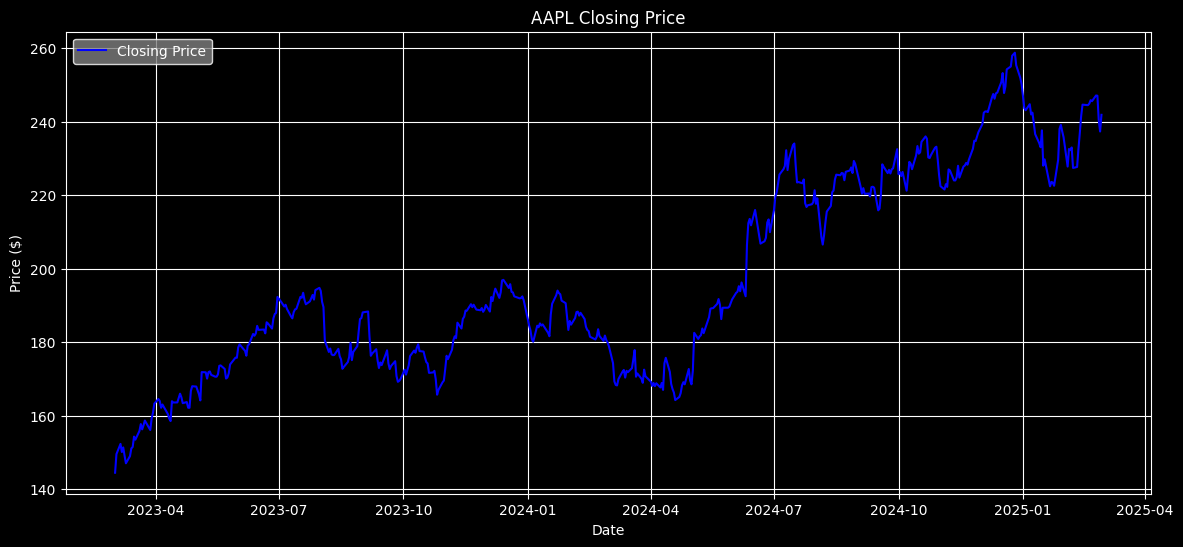

In [ ]:
# Set dark mode for the plot
plt.style.use('dark_background')  # Use dark background style

# Plot the closing price
plt.figure(figsize=(14, 6))

plt.plot(df['Close'], label='Closing Price', color='blue')  # Change color for visibility

# Add title, labels, and legend with appropriate colors for dark mode
plt.title(f'{stock_symbol} Closing Price', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Price ($)', color='white')
plt.legend(facecolor='gray', edgecolor='white', labelcolor='white')
plt.grid()

# Save the plot in 300dpi
plt.savefig(f'{stock_symbol}_stock_chart.png', dpi=300)

# Show the plot
plt.show()

**Data normalization:**

In [ ]:
# Normalize the data (scale between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Open', 'Volume', 'Low', 'High']]) # THIS NEEDS TO BE EXPANDED